In [1]:
import yaml
import numpy as np

from glob import glob

from scipy.interpolate import SmoothBivariateSpline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def create_spline(width, length, factor):
    ratio = width/length
    eqPonA = 2*(3*(ratio+1) - np.sqrt((3*ratio+1)*(ratio+3))) / width

    spline = SmoothBivariateSpline(width, eqPonA, factor, kx=1, ky=1)

    return spline

In [3]:
filepath = glob("model_cache/*.yml")[0]

In [4]:
with open(filepath, 'r') as inputFile:
    input_dict = yaml.load(inputFile)

In [5]:
label = [key for key in input_dict]

width = np.array([input_dict[key]['width'] for key in label])
length = np.array([input_dict[key]['length'] for key in label])
factor = np.array([input_dict[key]['factor'] for key in label])
spline = create_spline(width, length, factor)

In [6]:
def circle_fit(radii):
    result = spline.ev(radii*2, 2/radii)
    return result

In [7]:
x = np.linspace(0.1,7)
y = circle_fit(x)

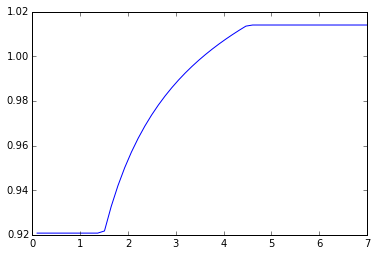

In [8]:
plt.plot(x,y)

In [9]:
ratio = width/length
eqPonA = 2*(3*(ratio+1) - np.sqrt((3*ratio+1)*(ratio+3))) / width

In [10]:
# from sklearn.linear_model import LinearRegression
# clf = linear_model.LinearRegression()
# clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in texts],
#         [t.y for t in texts])

In [11]:
training_data = np.vstack([width, eqPonA])
training_data

array([[ 4.38      ,  6.89      ,  4.        ,  4.63      ,  7.3       ,
         3.        ,  3.01      ,  5.01      ,  7.        ,  2.99      ,
         4.        ,  6.01      ,  7.66      ,  6.        ,  6.83      ,
         6.09      ,  3.57      ,  5.        ,  4.01      ,  5.62      ,
         6.31      ,  4.27      ,  5.86      ,  3.53      ,  5.12      ,
         4.        ,  6.25      ,  5.01      ,  7.44      ,  3.        ,
         8.        ,  6.07      ,  5.62      ,  7.59      ,  3.        ,
         9.        ,  6.95      ,  4.49      ,  5.9       ,  5.77      ,
         5.01      ,  3.98      ],
       [ 0.83790662,  0.49552666,  0.77072962,  0.78263445,  0.49569711,
         0.945174  ,  1.08094075,  0.6575308 ,  0.57142857,  1.33556392,
         0.81877094,  0.53312833,  0.44312141,  0.66666667,  0.4954342 ,
         0.58952242,  0.99896427,  0.8       ,  0.69891871,  0.60160406,
         0.57465703,  0.8607697 ,  0.61193061,  1.0513245 ,  0.60126525,
         0.73252

In [12]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

clf.fit(training_data.T, factor)
clf.coef_


array([ 0.0041106 , -0.07716418])

In [13]:
clf.intercept_

1.0127892126365856

In [14]:
a = clf.coef_
c = clf.intercept_


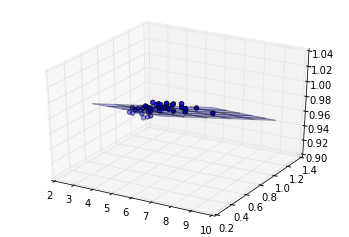

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(np.min(width), np.max(width))
y = np.linspace(np.min(eqPonA), np.max(eqPonA))

xx, yy = np.meshgrid(x, y)
zz = a[0] * xx + a[1] * yy + c

ax.plot_surface(xx,yy,zz, alpha=0.3)

ax.scatter(width, eqPonA, factor)


In [16]:
def circle_fit(radii):
    result = a[0] * radii*2 + a[1] * 2/radii + c
    return result
    
    

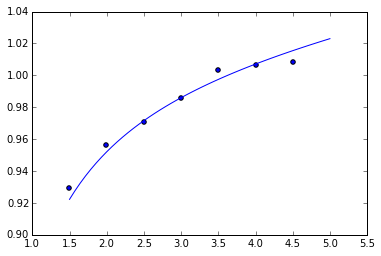

In [34]:
x = np.linspace(1.5,5)
y = circle_fit(x)

test = np.abs(width - length) < 0.1

plt.plot(x, y)
plt.scatter(width[test]/2, factor[test])